# Importing the necessary libraries

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

import os
import random
import numpy as np
import keras
import logging
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten


print('TensorFlow version:',tf.__version__)
print('Keras version:',keras.__version__)

TensorFlow version: 2.16.1
Keras version: 3.1.1


In [40]:
import sys
print(sys.executable)

c:\Users\ruslc\OneDrive\Desktop\rustDetection\.venv\Scripts\python.exe


In [41]:
# getting class names and printing them

data_folder = './Images/'
# data_folder = r'C:\Users\ruslc\OneDrive\Desktop\rustDetection\Images'

classes = os.listdir(data_folder) 
classes.sort()
print(len(classes), 'classes:')
print(classes)

3 classes:
['black rust', 'brown rust', 'not rust']


In [42]:
# # Renaming all the images in the selected folder

# def rename_images(folder_path):
#     # List all files in the folder
#     files = os.listdir(folder_path)
    
#     # Filter out only image files
#     image_files = [f for f in files if f.endswith('.png') or f.endswith('.jpg') or f.endswith('.JPEG')]
    
#     # Rename images
#     for i, image_file in enumerate(image_files, start=1):
#         old_path = os.path.join(folder_path, image_file)
#         new_path = os.path.join(folder_path, f"{str(i).zfill(3)}.png")  # Rename as 001.png, 002.png, ...
#         os.rename(old_path, new_path)

# folder_path = 'Images/brown rust'
# rename_images(folder_path)

# Brightening the images

In [43]:
# brightening black rust

import cv2
import matplotlib.pyplot as plt

folder_path = "Images/black rust"
output_folder = "Images/black rust"
brighter_factor = 1.5

first_image_displayed = False # this is done to check if the first image only has been displayed, s i only want to show the first image

for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.JPG') or filename.endswith('.png'):
        filepath = os.path.join(folder_path, filename)
        imgBGR = cv2.imread(filepath)
        if imgBGR is None:
            print(f"Error: Unable to read {filepath}")
            continue

        imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
        finalIMG = imgRGB * brighter_factor
        finalIMG = finalIMG.clip(0, 255).astype('uint8')

        if not first_image_displayed:
            plt.figure(figsize=(18, 6))

            plt.subplot(1, 2, 1)
            plt.imshow(imgRGB)
            plt.title('normal')

            plt.subplot(1, 2, 2)
            plt.imshow(finalIMG)
            plt.title('brighter')

            plt.show()

            first_image_displayed = True

        # Check if filename already contains "_brighter"
        if "_brighter" in filename or "_darker" in filename or "_rotated" in filename:
            print(f"Skipping {filename}: Image already brightened")
        else:
            # Save the brightened image
            filename_without_extension = os.path.splitext(filename)[0] # this is done to remove the extension, without it the name would be: name.jpg_brighter.png
            new_filename = filename_without_extension + "_brighter.png"
            output_filepath = os.path.join(output_folder, new_filename)
            cv2.imwrite(output_filepath, cv2.cvtColor(finalIMG, cv2.COLOR_RGB2BGR))

In [44]:
# brightening brown rust

import cv2
import matplotlib.pyplot as plt

folder_path = "Images/brown rust"
output_folder = "Images/brown rust"
brighter_factor = 1.5

first_image_displayed = False # this is done to check if the first image only has been displayed, s i only want to show the first image

for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.JPG') or filename.endswith('.png'):
        filepath = os.path.join(folder_path, filename)
        imgBGR = cv2.imread(filepath)
        if imgBGR is None:
            print(f"Error: Unable to read {filepath}")
            continue

        imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
        finalIMG = imgRGB * brighter_factor
        finalIMG = finalIMG.clip(0, 255).astype('uint8')

        if not first_image_displayed:
            plt.figure(figsize=(18, 6))

            plt.subplot(1, 2, 1)
            plt.imshow(imgRGB)
            plt.title('normal')

            plt.subplot(1, 2, 2)
            plt.imshow(finalIMG)
            plt.title('brighter')

            plt.show()

            first_image_displayed = True

        # Check if filename already contains "_brighter"
        if "_brighter" in filename or "_darker" in filename or "_rotated" in filename:
            print(f"Skipping {filename}: Image already modified")
        else:
            # Save the brightened image
            filename_without_extension = os.path.splitext(filename)[0] # this is done to remove the extension, without it the name would be: name.jpg_brighter.png
            new_filename = filename_without_extension + "_brighter.png"
            output_filepath = os.path.join(output_folder, new_filename)
            cv2.imwrite(output_filepath, cv2.cvtColor(finalIMG, cv2.COLOR_RGB2BGR))

In [45]:
# brightening no rust

import cv2
import matplotlib.pyplot as plt

folder_path = "Images/not rust"
output_folder = "Images/not rust"
brighter_factor = 1.5

first_image_displayed = False # this is done to check if the first image only has been displayed, s i only want to show the first image

for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.JPG') or filename.endswith('.png'):
        filepath = os.path.join(folder_path, filename)
        imgBGR = cv2.imread(filepath)
        if imgBGR is None:
            print(f"Error: Unable to read {filepath}")
            continue

        imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
        finalIMG = imgRGB * brighter_factor
        finalIMG = finalIMG.clip(0, 255).astype('uint8')

        if not first_image_displayed:
            plt.figure(figsize=(18, 6))

            plt.subplot(1, 2, 1)
            plt.imshow(imgRGB)
            plt.title('normal')

            plt.subplot(1, 2, 2)
            plt.imshow(finalIMG)
            plt.title('brighter')

            plt.show()

            first_image_displayed = True

        # Check if filename already contains "_brighter"
        if "_brighter" in filename or "_darker" in filename or "_rotated" in filename:
            print(f"Skipping {filename}: Image already modified")
        else:
            # Save the brightened image
            filename_without_extension = os.path.splitext(filename)[0] # this is done to remove the extension, without it the name would be: name.jpg_brighter.png
            new_filename = filename_without_extension + "_brighter.png"
            output_filepath = os.path.join(output_folder, new_filename)
            cv2.imwrite(output_filepath, cv2.cvtColor(finalIMG, cv2.COLOR_RGB2BGR))

# Darkening the images

In [46]:
# darkening black rust

import cv2
import matplotlib.pyplot as plt

folder_path = "Images/black rust"
output_folder = "Images/black rust"
darker_factor = 0.5

first_image_displayed = False # this is done to check if the first image only has been displayed, s i only want to show the first image

for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.JPG') or filename.endswith('.png'):
        filepath = os.path.join(folder_path, filename)
        imgBGR = cv2.imread(filepath)
        if imgBGR is None:
            print(f"Error: Unable to read {filepath}")
            continue

        imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
        finalIMG = imgRGB * darker_factor
        finalIMG = finalIMG.clip(0, 255).astype('uint8')

        if not first_image_displayed:
            plt.figure(figsize=(18, 6))

            plt.subplot(1, 2, 1)
            plt.imshow(imgRGB)
            plt.title('normal')

            plt.subplot(1, 2, 2)
            plt.imshow(finalIMG)
            plt.title('darker')

            plt.show()

            first_image_displayed = True

        # Check if filename already contains "_brighter"
        if "_brighter" in filename or "_darker" in filename or "_rotated" in filename:
            print(f"Skipping {filename}: Image already modified")
        else:
            # Save the brightened image
            filename_without_extension = os.path.splitext(filename)[0] # this is done to remove the extension, without it the name would be: name.jpg_brighter.png
            new_filename = filename_without_extension + "_darker.png"
            output_filepath = os.path.join(output_folder, new_filename)
            cv2.imwrite(output_filepath, cv2.cvtColor(finalIMG, cv2.COLOR_RGB2BGR))

In [47]:
# darkening brown rust

import cv2
import matplotlib.pyplot as plt

folder_path = "Images/brown rust"
output_folder = "Images/brown rust"
darker_factor = 0.5

first_image_displayed = False # this is done to check if the first image only has been displayed, as i only want to show the first image

for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.JPG') or filename.endswith('.png'):
        filepath = os.path.join(folder_path, filename)
        imgBGR = cv2.imread(filepath)
        if imgBGR is None:
            print(f"Error: Unable to read {filepath}")
            continue

        imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
        finalIMG = imgRGB * darker_factor
        finalIMG = finalIMG.clip(0, 255).astype('uint8')

        if not first_image_displayed:
            plt.figure(figsize=(18, 6))

            plt.subplot(1, 2, 1)
            plt.imshow(imgRGB)
            plt.title('normal')

            plt.subplot(1, 2, 2)
            plt.imshow(finalIMG)
            plt.title('darker')

            plt.show()

            first_image_displayed = True

        # Check if filename already contains "_brighter"
        if "_brighter" in filename or "_darker" in filename or "_rotated" in filename:
            print(f"Skipping {filename}: Image already modified")
        else:
            # Save the brightened image
            filename_without_extension = os.path.splitext(filename)[0] # this is done to remove the extension, without it the name would be: name.jpg_brighter.png
            new_filename = filename_without_extension + "_darker.png"
            output_filepath = os.path.join(output_folder, new_filename)
            cv2.imwrite(output_filepath, cv2.cvtColor(finalIMG, cv2.COLOR_RGB2BGR))

In [48]:
# darkening no rust

import cv2
import matplotlib.pyplot as plt

folder_path = "Images/not rust"
output_folder = "Images/not rust"
darker_factor = 0.5

first_image_displayed = False # this is done to check if the first image only has been displayed, as i only want to show the first image

for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.JPG') or filename.endswith('.png'):
        filepath = os.path.join(folder_path, filename)
        imgBGR = cv2.imread(filepath)
        if imgBGR is None:
            print(f"Error: Unable to read {filepath}")
            continue

        imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
        finalIMG = imgRGB * darker_factor
        finalIMG = finalIMG.clip(0, 255).astype('uint8')

        if not first_image_displayed:
            plt.figure(figsize=(18, 6))

            plt.subplot(1, 2, 1)
            plt.imshow(imgRGB)
            plt.title('normal')

            plt.subplot(1, 2, 2)
            plt.imshow(finalIMG)
            plt.title('darker')

            plt.show()

            first_image_displayed = True

        # Check if filename already contains "_brighter"
        if "_brighter" in filename or "_darker" in filename or "_rotated" in filename:
            print(f"Skipping {filename}: Image already modified")
        else:
            # Save the brightened image
            filename_without_extension = os.path.splitext(filename)[0] # this is done to remove the extension, without it the name would be: name.jpg_brighter.png
            new_filename = filename_without_extension + "_darker.png"
            output_filepath = os.path.join(output_folder, new_filename)
            cv2.imwrite(output_filepath, cv2.cvtColor(finalIMG, cv2.COLOR_RGB2BGR))

# Rotating the images by 45 degrees

In [49]:
# rotating black rust

import cv2
import matplotlib.pyplot as plt

folder_path = "Images/black rust"
output_folder = "Images/black rust"
rotation_angle = 45

first_image_displayed = False # this is done to check if the first image only has been displayed, as i only want to show the first image

for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.JPG') or filename.endswith('.png'):
        filepath = os.path.join(folder_path, filename)
        imgBGR = cv2.imread(filepath)
        if imgBGR is None:
            print(f"Error: Unable to read {filepath}")
            continue

        imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

        # Get the image dimensions
        (h, w) = imgRGB.shape[:2]
        center = (w // 2, h // 2)

        # Create the rotation matrix
        M = cv2.getRotationMatrix2D(center, rotation_angle, 1.0)

        # Perform the rotation
        rotated_img = cv2.warpAffine(imgRGB, M, (w, h))
        
        if not first_image_displayed:
            plt.figure(figsize=(18, 6))

            plt.subplot(1, 2, 1)
            plt.imshow(imgRGB)
            plt.title('normal')

            plt.subplot(1, 2, 2)
            plt.imshow(rotated_img)
            plt.title('rotated')

            plt.show()

            first_image_displayed = True

        # Check if filename already contains "_brighter"
        if "_rotated" in filename or "_brighter" in filename or "_darker" in filename:
            print(f"Skipping {filename}: Image already modified")
        else:
            # Save the brightened image
            filename_without_extension = os.path.splitext(filename)[0] # this is done to remove the extension, without it the name would be: name.jpg_brighter.png
            new_filename = filename_without_extension + "_rotated.png"
            output_filepath = os.path.join(output_folder, new_filename)
            cv2.imwrite(output_filepath, cv2.cvtColor(rotated_img, cv2.COLOR_RGB2BGR))

In [50]:
# rotating brown rust

import cv2
import matplotlib.pyplot as plt

folder_path = "Images/brown rust"
output_folder = "Images/brown rust"
rotation_angle = 45

first_image_displayed = False # this is done to check if the first image only has been displayed, as i only want to show the first image

for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.JPG') or filename.endswith('.png'):
        filepath = os.path.join(folder_path, filename)
        imgBGR = cv2.imread(filepath)
        if imgBGR is None:
            print(f"Error: Unable to read {filepath}")
            continue

        imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

        # Get the image dimensions
        (h, w) = imgRGB.shape[:2]
        center = (w // 2, h // 2)

        # Create the rotation matrix
        M = cv2.getRotationMatrix2D(center, rotation_angle, 1.0)

        # Perform the rotation
        rotated_img = cv2.warpAffine(imgRGB, M, (w, h))
        
        if not first_image_displayed:
            plt.figure(figsize=(18, 6))

            plt.subplot(1, 2, 1)
            plt.imshow(imgRGB)
            plt.title('normal')

            plt.subplot(1, 2, 2)
            plt.imshow(rotated_img)
            plt.title('rotated')

            plt.show()

            first_image_displayed = True

        # Check if filename already contains "_brighter"
        if "_rotated" in filename or "_brighter" in filename or "_darker" in filename:
            print(f"Skipping {filename}: Image already modified")
        else:
            # Save the brightened image
            filename_without_extension = os.path.splitext(filename)[0] # this is done to remove the extension, without it the name would be: name.jpg_brighter.png
            new_filename = filename_without_extension + "_rotated.png"
            output_filepath = os.path.join(output_folder, new_filename)
            cv2.imwrite(output_filepath, cv2.cvtColor(rotated_img, cv2.COLOR_RGB2BGR))

In [51]:
# rotating not rust

import cv2
import matplotlib.pyplot as plt

folder_path = "Images/not rust"
output_folder = "Images/not rust"
rotation_angle = 45

first_image_displayed = False # this is done to check if the first image only has been displayed, as i only want to show the first image

for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.JPG') or filename.endswith('.png'):
        filepath = os.path.join(folder_path, filename)
        imgBGR = cv2.imread(filepath)
        if imgBGR is None:
            print(f"Error: Unable to read {filepath}")
            continue

        imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

        # Get the image dimensions
        (h, w) = imgRGB.shape[:2]
        center = (w // 2, h // 2)

        # Create the rotation matrix
        M = cv2.getRotationMatrix2D(center, rotation_angle, 1.0)

        # Perform the rotation
        rotated_img = cv2.warpAffine(imgRGB, M, (w, h))
        
        if not first_image_displayed:
            plt.figure(figsize=(18, 6))

            plt.subplot(1, 2, 1)
            plt.imshow(imgRGB)
            plt.title('normal')

            plt.subplot(1, 2, 2)
            plt.imshow(rotated_img)
            plt.title('rotated')

            plt.show()

            first_image_displayed = True

        # Check if filename already contains "_brighter"
        if "_rotated" in filename or "_brighter" in filename or "_darker" in filename:
            print(f"Skipping {filename}: Image already modified")
        else:
            # Save the brightened image
            filename_without_extension = os.path.splitext(filename)[0] # this is done to remove the extension, without it the name would be: name.jpg_brighter.png
            new_filename = filename_without_extension + "_rotated.png"
            output_filepath = os.path.join(output_folder, new_filename)
            cv2.imwrite(output_filepath, cv2.cvtColor(rotated_img, cv2.COLOR_RGB2BGR))

# Bar Chart

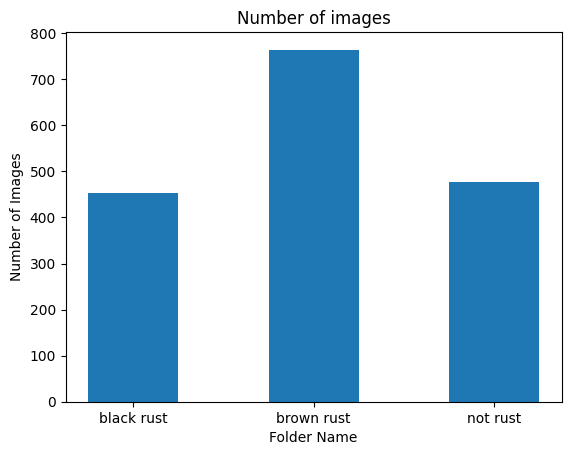

In [52]:
# getting a bar chart of all the categories in the data set

import os
import matplotlib.pyplot as plt

def count_images_in_folder(folder_path):
    count = 0
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.JPG'):
            count += 1
    return count

folder_paths = [r'C:/Users/ruslc/OneDrive/Desktop/rustDetection/Images/black rust',
                r'C:/Users/ruslc/OneDrive/Desktop/rustDetection/Images/brown rust', 
                r'C:/Users/ruslc/OneDrive/Desktop/rustDetection/Images/not rust']
class_names = ['black rust', 'brown rust', 'not rust']
number_classes = {class_names[i]: count_images_in_folder(folder_paths[i]) for i in range(len(folder_paths))}

plt.bar(number_classes.keys(), number_classes.values(), width=0.5)
plt.title("Number of images")
plt.xlabel("Folder Name")
plt.ylabel("Number of Images")
plt.show()


# Data Generators

In [53]:
# splitting the data (80/20)

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (75, 75)
batch_size = 4

img_height = img_size[0]
img_width = img_size[1]

print("Getting Data...")
datagen = ImageDataGenerator(rescale=1./255, # normalizing pixel values
                             validation_split=0.2) # hold back 20% of the images for validation

print("_________________________")
print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # setting as training data


print("_________________________")
print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # setting as validation data

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_folder,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=img_size,
  batch_size=batch_size).repeat()

print("_________________________")
classnames = list(train_generator.class_indices.keys())
print('Data generators ready')

def denormalize_image(image, image_data_generator):
    image = image * np.array(image_data_generator.std, dtype=np.float32) + np.array(image_data_generator.mean, dtype=np.float32)
    return image.astype("uint8")


Getting Data...
_________________________
Preparing training dataset...
Found 1355 images belonging to 3 classes.
_________________________
Preparing validation dataset...
Found 337 images belonging to 3 classes.
Found 1692 files belonging to 3 classes.
Using 1354 files for training.
_________________________
Data generators ready


# Data Augmentation

In [54]:
import matplotlib.pyplot as plt
import logging
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
logging.getLogger('tensorflow').setLevel(logging.ERROR)

img_height = img_size[0]
img_width = img_size[1]

input_shape = (img_height, img_width, 3)

data_augmentation = keras.Sequential(
  [
    layers.Input(shape=input_shape),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(factor=0.1),
    layers.RandomBrightness(factor=0.2),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1), #random horziontal shift
    layers.RandomCrop(height=img_height, width=img_width)
    
    #layers.Lambda(lambda x: tf.image.random_saturation(x, lower=0.8, upper=1.2)),
    #layers.Lambda(lambda x: tf.image.random_hue(x, max_delta=0.2)),
    #layers.Lambda(lambda x: x + tf.random.normal(shape=tf.shape(x), mean=0.0, stddev=0.1))
  ]
)

# Model Creation

In [55]:
# model creation

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import LearningRateScheduler

model = Sequential()

model.add(Conv2D(32, (6, 6), input_shape=train_generator.image_shape, activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(train_generator.num_classes, activation='softmax'))

# learning rate scheduler function
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1).numpy())

lr_scheduler = LearningRateScheduler(scheduler)

opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print(model.summary())

learning_rate = model.optimizer.learning_rate
print("Learning Rate: ", learning_rate.numpy())


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 70, 70, 32)     │         3,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 35, 35, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 30, 30, 32)     │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 32)     │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         2,403 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,683 (311.26 KB)

 Trainable params: 79,683 (311.26 KB)

 Non-trainable params: 0 (0.00 B)

None
Learning Rate:  1e-04


# Model Training

In [56]:
# model training

num_epochs = 75

steps_per_epoch = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size

history = model.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    validation_data = validation_generator, 
    validation_steps = validation_steps,
    epochs = num_epochs,
    callbacks = [lr_scheduler],
    verbose = 1)
print(history.history.keys())


Epoch 1/75
338/338 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.5007 - loss: 0.9483 - val_accuracy: 0.6786 - val_loss: 0.7263 - learning_rate: 1.0000e-04
Epoch 2/75
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 65us/step - accuracy: 0.5000 - loss: 0.4799 - val_accuracy: 0.0000e+00 - val_loss: 1.0613 - learning_rate: 1.0000e-04
Epoch 3/75
  4/338 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5000 - loss: 0.9171  

C:\Users\ruslc\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


338/338 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.6899 - loss: 0.6463 - val_accuracy: 0.6429 - val_loss: 0.7972 - learning_rate: 1.0000e-04
Epoch 4/75
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 33us/step - accuracy: 0.5000 - loss: 0.3396 - val_accuracy: 1.0000 - val_loss: 0.0020 - learning_rate: 1.0000e-04
Epoch 5/75
338/338 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.7717 - loss: 0.5279 - val_accuracy: 0.6935 - val_loss: 0.6730 - learning_rate: 1.0000e-04
Epoch 6/75
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 33us/step - accuracy: 1.0000 - loss: 0.1222 - val_accuracy: 1.0000 - val_loss: 0.0317 - learning_rate: 1.0000e-04
Epoch 7/75
338/338 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.7671 - loss: 0.5637 - val_accuracy: 0.7083 - val_loss: 0.6346 - learning_rate: 1.0000e-04
Epoch 8/75
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 33us/step - accuracy: 1.0000 - loss: 0.1022 - val_accuracy: 1.0000 - val_loss: 0.0226 - learning_rate: 1.0000e-04
Epoch 9/75
338/338 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 

# Confusion Matrix

Generating predictions from validation data...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


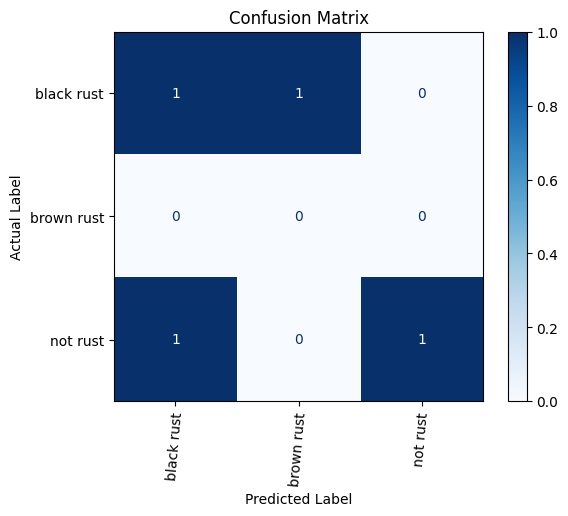

In [57]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming `validation_generator` and `model` are already defined and initialized
# and `classnames` contains the names of the classes

# Get a large batch of validation data for better evaluation
print("Generating predictions from validation data...")
x_test, y_test = next(validation_generator)

# Predict the class probabilities
class_probabilities = model.predict(x_test)

# Convert probabilities to predicted class labels
predictions = np.argmax(class_probabilities, axis=1)

# Convert one-hot encoded true labels to class labels
true_labels = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plotting the confusion matrix with better formatting
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classnames)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=85)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


# Loss History Graph

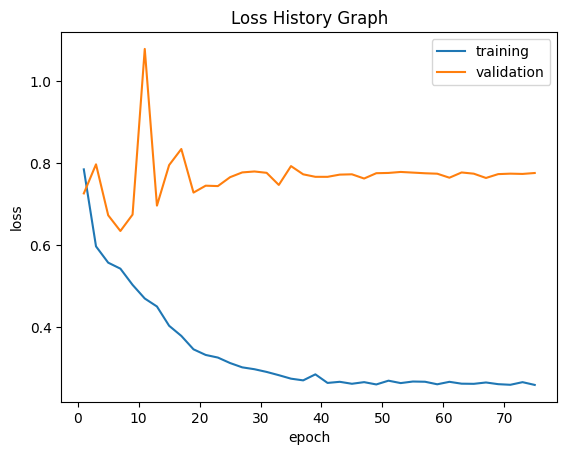

In [58]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]

# plt.plot(epoch_nums, training_loss)
# plt.plot(epoch_nums, validation_loss)
# plt.title('Loss History Graph')
# plt.xlabel('epoch')
# plt.ylabel('loss')
# plt.legend(['training', 'validation'], loc='upper right')
# plt.show()

# Filter the epoch numbers, training loss, and validation loss to include only odd epochs
odd_epoch_nums = [epoch for epoch in epoch_nums if epoch % 2 != 0]
odd_training_loss = [training_loss[i-1] for i in odd_epoch_nums]
odd_validation_loss = [validation_loss[i-1] for i in odd_epoch_nums]

plt.plot(odd_epoch_nums, odd_training_loss)
plt.plot(odd_epoch_nums, odd_validation_loss)
plt.title('Loss History Graph')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()


# Accuracy Graph

Highest Training Accuracy: 0.9111769199371338
Highest Validation Accuracy: 0.7083333134651184


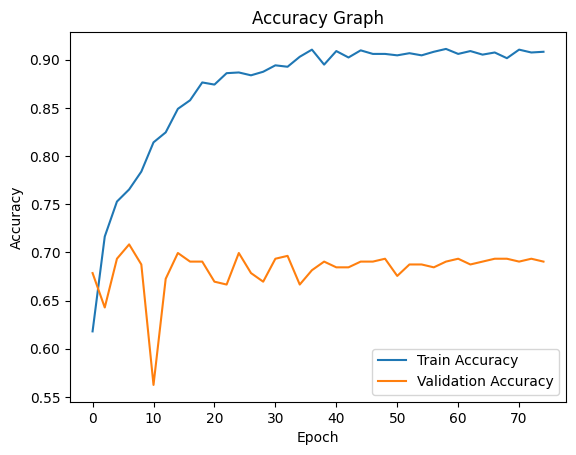

In [59]:
import matplotlib.pyplot as plt

# Plot accuracy
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# Get the list of epochs (0-based index)
epochs = range(len(history.history['accuracy']))

# Filter to get only odd epochs (1-based index)
odd_epochs = [epoch for epoch in epochs if (epoch + 1) % 2 != 0]

# Filter accuracy and validation accuracy for odd epochs
train_accuracy_odd = [history.history['accuracy'][epoch] for epoch in odd_epochs]
val_accuracy_odd = [history.history['val_accuracy'][epoch] for epoch in odd_epochs]

# Finding the maximum accuracy values
max_train_accuracy_odd = max(train_accuracy_odd)
max_val_accuracy_odd = max(val_accuracy_odd)

print(f"Highest Training Accuracy: {max_train_accuracy_odd}")
print(f"Highest Validation Accuracy: {max_val_accuracy_odd}")

plt.plot(odd_epochs, train_accuracy_odd, label='Train Accuracy')
plt.plot(odd_epochs, val_accuracy_odd, label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# # Extract accuracies for odd epochs
# odd_epochs = list(range(1, len(history.history['accuracy']) + 1, 2))
# train_accuracy_odd_epochs = [history.history['accuracy'][i] for i in range(len(history.history['accuracy'])) if i % 2 == 0]
# val_accuracy_odd_epochs = [history.history['val_accuracy'][i] for i in range(len(history.history['val_accuracy'])) if i % 2 == 0]

# plt.figure(figsize=(10, 6))
# plt.plot(odd_epochs, train_accuracy_odd_epochs, marker='o', linestyle='-', label='Train Accuracy')
# plt.plot(odd_epochs, val_accuracy_odd_epochs, marker='o', linestyle='--', label='Validation Accuracy')
# plt.title('Model Accuracy Graph')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.xticks(odd_epochs, rotation=45, fontsize=10)  # ensuring only odd epochs are shown on the x-axis, and rotate them to better fit without overlapping
# plt.legend()
# plt.grid(True)
# plt.show()


# Recall & Precision Graphs

85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step
^Epoch: 1
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step
^Epoch: 2
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step
^Epoch: 3
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step
^Epoch: 4
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step
^Epoch: 5
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step
^Epoch: 6
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step
^Epoch: 7
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step
^Epoch: 8
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step
^Epoch: 9
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step
^Epoch: 10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step
^Epoch: 11
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step
^Epoch: 12
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step
^Epoch: 13
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step
^Epoch: 14
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step
^Epoch: 15
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step
^Epoch: 16
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step
^Epoch: 17
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step
^Epoch: 18
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step
^Epoch: 19
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step


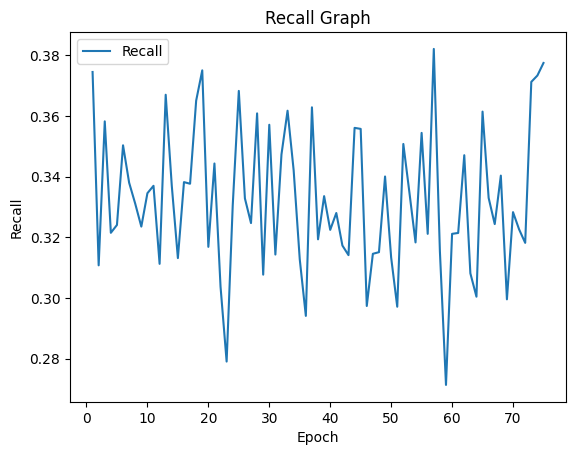

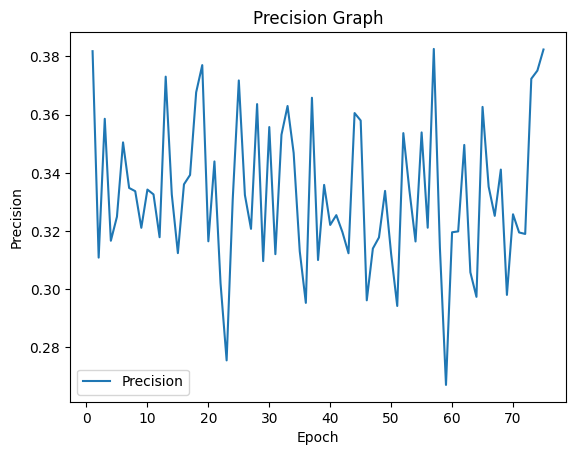

In [60]:
import numpy as np
from sklearn.metrics import recall_score, precision_score
import matplotlib.pyplot as plt

# Define empty lists to store recall and precision scores
recalls = []
precisions = []

# Iterate over each epoch
for epoch in range(num_epochs):
    # Assuming you have a test generator with true labels for each epoch
    y_true_epoch = validation_generator.classes
    
    # Get model predictions for each epoch
    y_pred_prob_epoch = model.predict(validation_generator)
    y_pred_binary_epoch = np.argmax(y_pred_prob_epoch, axis=1)
    
    # Calculate recall and precision for each epoch
    recall_epoch = recall_score(y_true_epoch, y_pred_binary_epoch, average='macro')
    precision_epoch = precision_score(y_true_epoch, y_pred_binary_epoch, average='macro')
    
    # Append recall and precision scores to the lists
    recalls.append(recall_epoch)
    precisions.append(precision_epoch)
    
    # Print the current epoch number
    print("^Epoch:", epoch + 1)

# Plot recall
plt.plot(range(1, num_epochs+1), recalls, label='Recall')
plt.title('Recall Graph')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.show()

# Plot precision
plt.plot(range(1, num_epochs+1), precisions, label='Precision')
plt.title('Precision Graph')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.show()


# F1-Score

Evaluating the model...
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step
F1 Score: 0.33282386598050073


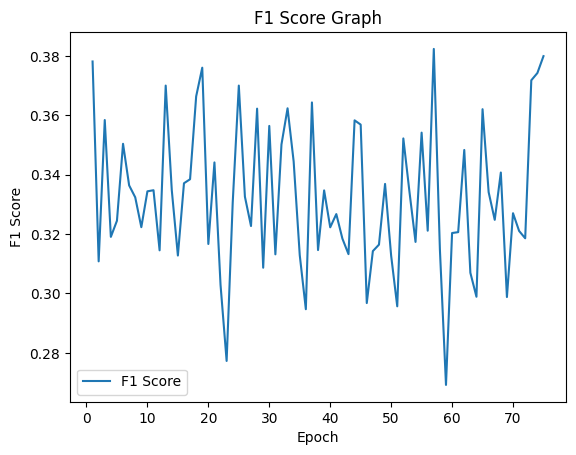

In [61]:
from sklearn.metrics import f1_score

# Evaluate the model and calculate F1 score
print("Evaluating the model...")
validation_generator.reset()
y_pred = model.predict(validation_generator, steps=validation_steps)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels from validation generator
y_true = validation_generator.classes[:len(y_pred_classes)]

# Calculating F1 score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f"F1 Score: {f1}")

# graph
# Define empty list to store F1 scores
f1_scores = []

# Iterate over each epoch
for epoch in range(num_epochs):
    # Calculate F1 score for each epoch
    recall_epoch = recalls[epoch]
    precision_epoch = precisions[epoch]
    f1_score_epoch = 2 * (precision_epoch * recall_epoch) / (precision_epoch + recall_epoch)
    
    # Append F1 score to the list
    f1_scores.append(f1_score_epoch)

# Plot F1 score
plt.plot(range(1, num_epochs+1), f1_scores, label='F1 Score')
plt.title('F1 Score Graph')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

In [62]:
# saving the trained model

modelFileName = 'models/rust_detector.h5'
model.save(modelFileName)
del model  # deletes the existing cnn model variable
print('Model saved as', modelFileName)

Model saved as models/rust_detector.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


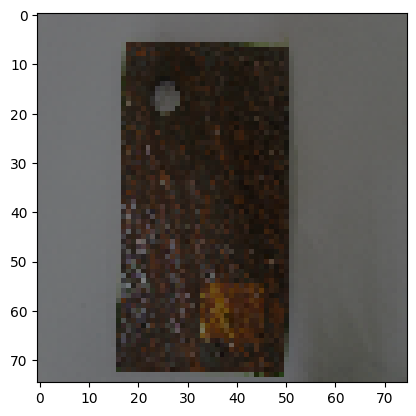

Class black rust: 21.19%
Class brown rust: 57.61%
Class not rust: 21.19%
This random image most likely belongs to the brown rust class with a 57.61 percent confidence.


In [63]:
# prediction

import tensorflow as tf
import numpy as np
import os
import random
import matplotlib.pyplot as plt

from tensorflow import keras

# Define the path to the folder containing the images
data_folder = '/Users/ruslc/OneDrive/Desktop/rustDetection/Images'

# Get a list of all subdirectories (no rust or rust categories) within the data folder
categories = os.listdir(data_folder)

# Select a random category
random_category = random.choice(categories)

# Get the list of images within the selected category folder
category_folder = os.path.join(data_folder, random_category)
image_files = os.listdir(category_folder)

# Select a random image from the category
random_image = random.choice(image_files)
rust_path = os.path.join(category_folder, random_image)

model = tf.keras.models.load_model('/Users/ruslc/OneDrive/Desktop/rustDetection/models/rust_detector.h5')

img_size = (75, 75)
batch_size = 4

img_height = img_size[0]
img_width = img_size[1]

img = tf.keras.utils.load_img(
    rust_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

classnames = ['black rust', 'brown rust', 'not rust']

# Display the image
plt.imshow(img)
plt.axis()
plt.show()

for i, prob in enumerate(score):
    print("Class {}: {:.2f}%".format(classnames[i], 100 * prob))

print(
    "This random image most likely belongs to the {} class with a {:.2f} percent confidence."
    .format(classnames[np.argmax(score)], 100 * np.max(score))
)
